In [102]:
# importing required libraries

import os
import tensorflow as tf
import datetime
from tensorflow import keras
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
%load_ext tensorboard
import seaborn as sns
from tensorflow.keras import layers
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import Augmentor

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Question-1

### Part a):- Performing EDA of the given dataset

In [2]:
df = pd.read_csv(r'C:\Users\conno\Downloads\work\1. Study(main objective)\Artificial Intelligence\4. Intellipaat AI course\Modules\3. AI(DEEP LEARNING)\Assignments\Live-class\Assignment-6\train.csv')

In [3]:
df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [4]:
df.shape

(1821, 5)

In [5]:
#checking for null values

df.isnull().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [6]:
df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [7]:
df['label'] = df.apply(lambda x: np.argmax(x[1:]),axis=1)

In [8]:
df.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


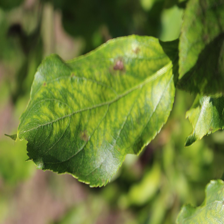

In [9]:
#Loading the 1st image from the dataset

from PIL import Image
img = Image.open(r'C:\Users\conno\Downloads\work\1. Study(main objective)\Artificial Intelligence\4. Intellipaat AI course\Modules\3. AI(DEEP LEARNING)\Assignments\Live-class\Assignment-6\dataset\images\Train_0.JPG')
img = img.resize((224,224))
img

In [10]:
#converting the given image into array
nparr  = np.asarray(img)

In [11]:
#Here, as we can see, the size of the image is too large...

nparr.shape 

(224, 224, 3)

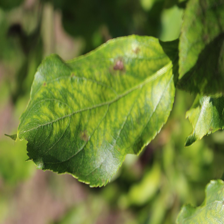

In [12]:
# Just visualizing the one image from the given dataset...

img = img.resize((224,224))
img

In [13]:
df.shape

(1821, 6)

In [14]:
df.iloc[0]['image_id']

'Train_0'

### Prepairing the dataset...

In [15]:
## splitting the dataset..

from sklearn.model_selection import train_test_split

traindf, validatedf = train_test_split(df, test_size=0.2)

print(traindf.shape)
print(validatedf.shape)

(1456, 6)
(365, 6)


In [16]:
new_img_size = (224,224)

In [17]:
traindf.shape

(1456, 6)

In [18]:
#traindf.iloc[1454]

In [19]:
traindf.shape[0]

1456

In [20]:
## Converting all images in the training dataset into arrays for our algorithm and also resizing them...

images_train = np.array([np.asarray(img)])

for i in range(1,traindf.shape[0]):
    img = Image.open(f'C:/Users/conno/Downloads/work/1. Study(main objective)/Artificial Intelligence/4. Intellipaat AI course/Modules/3. AI(DEEP LEARNING)/Assignments/Live-class/Assignment-6/dataset/images/{traindf.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_train = np.concatenate((images_train,np.array([np.asarray(img)])),axis=0)


In [21]:
print("Training set is of shape : ",images_train.shape)

Training set is of shape :  (1456, 224, 224, 3)


In [22]:
## Converting all images in the validation dataset into arrays for our algorithm and also resizing them...

images_validate = np.array([np.asarray(img)])

for i in range(1,validatedf.shape[0]):
    img = Image.open(f'C:/Users/conno/Downloads/work/1. Study(main objective)/Artificial Intelligence/4. Intellipaat AI course/Modules/3. AI(DEEP LEARNING)/Assignments/Live-class/Assignment-6/dataset/images/{validatedf.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_validate = np.concatenate((images_validate,np.array([np.asarray(img)])),axis=0)

In [23]:
print("Validation set is of shape : ",images_validate.shape)

Validation set is of shape :  (365, 224, 224, 3)


In [24]:
testdf = pd.read_csv(r'C:\Users\conno\Downloads\work\1. Study(main objective)\Artificial Intelligence\4. Intellipaat AI course\Modules\3. AI(DEEP LEARNING)\Assignments\Live-class\Assignment-6\test.csv')

In [25]:
testdf.shape

(1821, 1)

In [116]:
testdf.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [26]:
testdf.iloc[0]

image_id    Test_0
Name: 0, dtype: object

In [27]:
## Converting all images in the test dataset into arrays for our algorithm and also resizing them...

images_test = np.array([np.asarray(img)])

for i in range(1,testdf.shape[0]):
    img = Image.open(f'C:/Users/conno/Downloads/work/1. Study(main objective)/Artificial Intelligence/4. Intellipaat AI course/Modules/3. AI(DEEP LEARNING)/Assignments/Live-class/Assignment-6/dataset/images/{testdf.iloc[i]["image_id"]}.jpg')
    img = img.resize(new_img_size)
    images_test = np.concatenate((images_test,np.array([np.asarray(img)])),axis=0)

In [28]:
print("Test set is of shape : ",images_test.shape)

Test set is of shape :  (1821, 224, 224, 3)


In [29]:
images_train[0].shape

(224, 224, 3)

### Visualizing the Images...

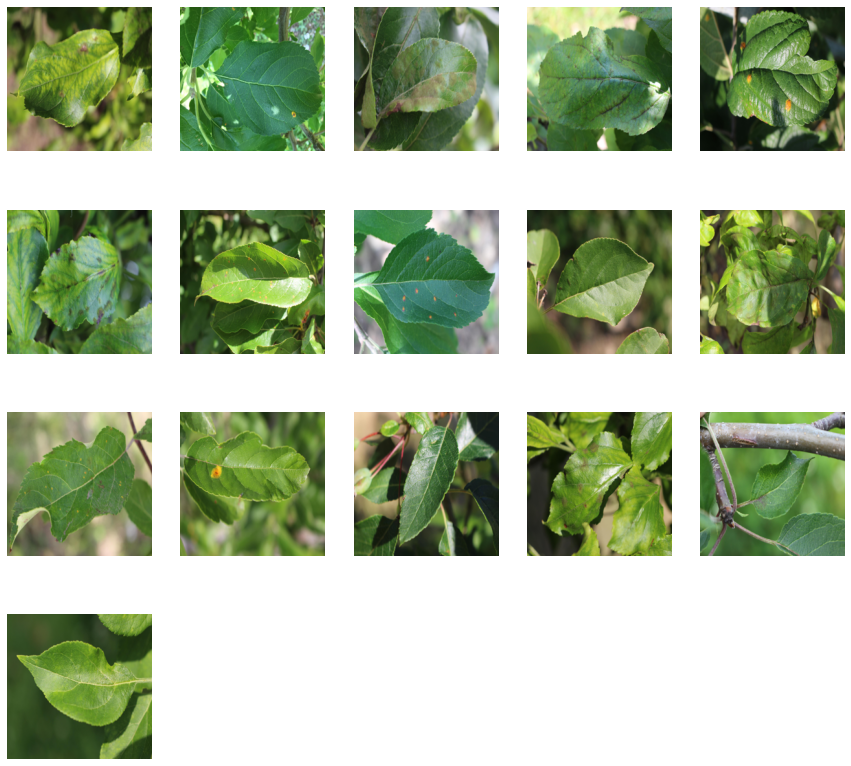

In [30]:
plt.figure(figsize=(15,18))
for i in range(16):
    plt.subplot(5, 5, i+1)
    plt.imshow(images_train[i])
    plt.axis('off')
plt.show()

### Question-2 



### part a)-

Here, as the data was scarce, so the typical routine which needs to be followed is known as data Augmentation. In it, we just create different variants of the same image which results in increased number of images which will help our model generalize well and also will reduce chances of overftting.


### part b)-

There can be various augmentation techniques which can be applied but here I will use the rotation, zoom, horizontal flip etc...
. Please note that it's individual's discretion which ones he will like to use.

### Performing image Augmentation...

#### The above one was the augmentation using ImageDataGenerator. However, as asked in the question, here we will use inbuilt image Augmentator in Keras.

The documentation for the same is:

https://www.tensorflow.org/tutorials/images/data_augmentation


In [31]:
data_augmentaion = Sequential([
    layers.RandomRotation(factor=(-0.2,0.2),seed = 123),
    layers.RandomZoom(0.1),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

### part c)-

#### The inbuilt keras augmentator was used as implemented above. 

### Question-3)-Defining the model

### Architecture-1:

In [ ]:
# model = Sequential([
#     layers.Rescaling(1./255.,input_shape=(224,224,3)),
#     data_augmentaion,   #added data augmentation here
#     layers.Conv2D(8,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Dropout(0.2),
#     layers.Conv2D(16,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Dropout(0.2),
#     layers.Conv2D(32,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Dropout(0.4),
#     layers.Flatten(),
#     layers.Dense(256,activation='relu'),
#     layers.Dense(64,activation='relu'),
#     layers.Dense(4,activation='softmax'),   
# ])

# model.build()

### Architecture-2:

In [82]:
# model = Sequential([
#     layers.Rescaling(1./255.,input_shape=(224,224,3)),
#     data_augmentaion,   #added data augmentation here
#     layers.Conv2D(16,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Dropout(0.2),
#     layers.Conv2D(32,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Dropout(0.2),
#     layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPooling2D(2,2),
#     layers.Dropout(0.4),
#     layers.Flatten(),
#     layers.Dense(256,activation='relu'),
#     layers.Dense(64,activation='relu'),
#     layers.Dense(4,activation='softmax'),   
# ])

# model.build()


In [83]:
# removing previous log files if any for tensorboard...
!rm -rf 'C:\Users\conno\Downloads\work\1. Study(main objective)\Artificial Intelligence\4. Intellipaat AI course\Modules\3. AI(DEEP LEARNING)\Assignments\Live-class\Assignment-6\logs'

In [92]:
model.compile(
    optimizer='rmsprop',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


## Tensorboard initiation...

log_dir = r"C:\Users\conno\Downloads\work\1. Study(main objective)\Artificial Intelligence\4. Intellipaat AI course\Modules\3. AI(DEEP LEARNING)\Assignments\Live-class\Assignment-6\logs3"


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) 
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 111, 111, 16)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      4640      
                                                      

In [85]:

batch_size = 32
epochs = 20

history = model.fit(
    images_train,
    traindf['label'],
    callbacks=[tensorboard_callback],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(images_validate,validatedf['label']))

Epoch 1/20
46/46 [==============================] - 33s 675ms/step - loss: 1.8818 - accuracy: 0.3359 - val_loss: 1.2882 - val_accuracy: 0.3507
Epoch 2/20
46/46 [==============================] - 30s 646ms/step - loss: 1.2577 - accuracy: 0.3413 - val_loss: 1.2577 - val_accuracy: 0.3507
Epoch 3/20
46/46 [==============================] - 29s 637ms/step - loss: 1.2590 - accuracy: 0.3262 - val_loss: 1.2748 - val_accuracy: 0.3699
Epoch 4/20
46/46 [==============================] - 29s 623ms/step - loss: 1.2482 - accuracy: 0.3537 - val_loss: 1.2263 - val_accuracy: 0.3836
Epoch 5/20
46/46 [==============================] - 29s 624ms/step - loss: 1.2301 - accuracy: 0.3750 - val_loss: 1.1788 - val_accuracy: 0.4192
Epoch 6/20
46/46 [==============================] - 29s 624ms/step - loss: 1.2076 - accuracy: 0.4224 - val_loss: 1.1517 - val_accuracy: 0.4740
Epoch 7/20
46/46 [==============================] - 29s 626ms/step - loss: 1.1889 - accuracy: 0.4712 - val_loss: 1.3067 - val_accuracy: 0.3479

In [95]:
#Opening tensorboard...
#tensorboard --logdir=logs --port 5000

#tensorboard --logdir=logs --port 5050

In [100]:
#starting tensorboard tp visualize the results

#%tensorboard --logdir="C:/Users/conno/Downloads/work/1. Study(main objective)/Artificial Intelligence/4. Intellipaat AI course\Modules/3. AI(DEEP LEARNING)/Assignments/Live-class/Assignment-6/logs3"

In [97]:
# Analyzing metrics

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

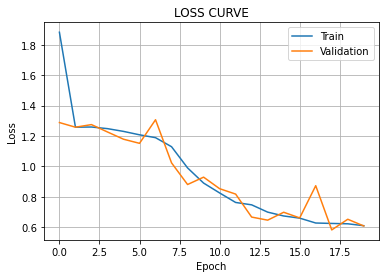

In [98]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

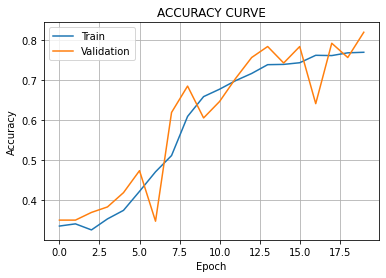

In [99]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [ ]:
## Checking performance of our model...

In [48]:
predictions = model.predict(images_test)

57/57 [==============================] - 4s 64ms/step


In [49]:
predictions.shape

(1821, 4)

In [122]:
preds_final = np.argmax(predictions, axis = 1) 

In [123]:
preds_final

array([3, 2, 3, ..., 2, 3, 0], dtype=int64)

In [125]:
predictions_df = pd.DataFrame(np.round(preds_final,2))

In [126]:
predictions[0].round(2) # so, the first test image has scab according to our model's prediction...

array([0.4 , 0.07, 0.03, 0.5 ], dtype=float32)

In [128]:
predictions_df = pd.DataFrame(np.round(predictions,2))
submission_df = pd.concat([testdf,predictions_df],axis=1)

In [131]:
label_encode = {0:"healthy",1:"multiple_diseases",2:"rust",3:"scab"}

In [132]:
submission_df.rename(columns={k:label_encode[k] for k in range(0,4)}).to_csv("final_outcome.csv",index=False)

### References:

https://github.com/mdbloice/Augmentor


https://www.kaggle.com/code/geochatz/plant-pathology-classification-with-tensorflow/notebook